In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# INSTALLING REQUIRED LIBRARIES
!pip install plotly
!pip install osmnx
!pip install contextily
!pip install cartopy
!pip install -U pyproj -q
!pip install -U utm -q
!pip install -U google-colab -q
!pip install -U tornado -q
!pip install geemap -q
!pip install wxee
!pip install plotly --upgrade
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.4/435.4 kB 5.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado==6.3.3, but you have tornado 6.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successful

In [ ]:
!pip install geemap

In [ ]:
# !earthengine authenticate
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

In [ ]:
import ee
import wxee
#wxee.Initialize()
from geopy.geocoders import Nominatim
from pyproj import CRS
import utm
#import proj
import pandas as pd
import numpy as np

In [ ]:
download = False
if download:
    start_date = '2018-01-05'
    end_date = '2018-01-15'
    dataset = ee.ImageCollection('MODIS/061/MOD09GQ').filter(ee.Filter.date(start_date, end_date))

In [ ]:
# Landfalling region of gulf of mexico
if download:
    aoi = ee.Geometry.Polygon(
            [[[-95.45,29.85],
            [-95.15,29.85],
            [-95.15,29.55],
            [-95.45,29.55]
            ]])

In [ ]:
# dataset = dataset.set('system:time_start', 0)
if download:
    ds_modis = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')

In [ ]:
if download:
    ds_modis

In [ ]:
if download:
    ds_modis.sur_refl_b01.isel(time=0).plot()

In [ ]:
if download:
    ds_modis.sur_refl_b02.isel(time=0).plot()

In [ ]:
if download:
    dataset = ee.ImageCollection("COPERNICUS/S1_GRD").filterBounds(aoi).filterDate(start_date,end_date)
    ds_s1 = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')

In [ ]:
if download:
    ds_s1

In [ ]:
if download:
    ds_s1.VV.isel(time=4).plot()

In [ ]:
if download:
    np.sum(np.isnan(ds_s1.VV.isel(time=4).values))

In [ ]:
from datetime import datetime
# Define the start and end dates.
if download:
    start_date = datetime(2015, 1, 1)
    end_date = datetime(2023, 12, 31)

    # Loop through each month between the start and end dates.
    current_date = start_date
    while current_date <= end_date:
        next_month = (current_date.month % 12) + 1
        next_year = current_date.year + (current_date.month // 12)
        next_date = datetime(next_year, next_month, 1)

        # Define the date range for the current month.
        start_str = current_date.strftime('%Y-%m-%d')
        end_str = next_date.strftime('%Y-%m-%d')

        # Filter the dataset by date and AOI.
        dataset = ee.ImageCollection("COPERNICUS/S1_GRD").filterBounds(aoi).filterDate(start_str, end_str)
        ds_s1 = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)

        # Remove times with NaN values from the dataset.
        ds_s1 = ds_s1.dropna(dim='time', how='any')

        # Save the dataset to a NetCDF file with a suffix indicating the month and year.
        file_name = f's1_{current_date.strftime("%Y_%m")}.nc'
        ds_s1.to_netcdf(file_name)

        # Move to the next month.
        current_date = next_date

In [ ]:
if download:
    !mkdir /content/drive/MyDrive/modis2s1
    !cp *.nc /content/drive/MyDrive/modis2s1

In [ ]:
import xarray as xr
import datetime
# Define the start and end dates.

if download:
    # Define the start and end dates.
    start_date = datetime.datetime(2022, 11, 1)
    end_date = datetime.datetime(2023, 12, 31)

    # Loop through each month between the start and end dates.
    current_date = start_date
    while current_date <= end_date:
        next_month = (current_date.month % 12) + 1
        next_year = current_date.year + (current_date.month // 12)
        next_date = datetime.datetime(next_year, next_month, 1)

        # Define the date range for the current month.
        start_str = current_date.strftime('%Y-%m-%d')
        end_str = next_date.strftime('%Y-%m-%d')

        # Filter the dataset by date and AOI.
        dataset = ee.ImageCollection('MODIS/061/MOD09GQ').filterBounds(aoi).filterDate(start_str, end_str)
        ds_modis = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)

        # Open the corresponding NetCDF file.
        file_name = f's1_{current_date.strftime("%Y_%m")}.nc'
        ds_s1 = xr.open_dataset(file_name)

        # Extract the dates from ds_s1 and truncate the time part.
        s1_dates = pd.to_datetime(ds_s1['time'].values).normalize()

        # Truncate the time part from the MODIS dates.
        modis_dates = pd.to_datetime(ds_modis['time'].values).normalize()

        # Filter ds_modis to include only the dates present in ds_s1.
        ds_modis_filtered = ds_modis.sel(time=modis_dates.isin(s1_dates))

        # Save the filtered dataset to a new NetCDF file.
        filtered_file_name = f'modis_filtered_{current_date.strftime("%Y_%m")}.nc'
        ds_modis_filtered.to_netcdf(filtered_file_name)

        # Move to the next month.
        current_date = next_date

In [ ]:
if download:
    !mv modis_filtered*.nc /content/drive/MyDrive/modis2s1

In [ ]:
if download:
    ds_modis_filtered = xr.open_mfdataset('/content/drive/MyDrive/modis2s1/modis_filtered_*.nc', concat_dim='time', combine='nested')
    ds_s1 = xr.open_mfdataset('/content/drive/MyDrive/modis2s1/s1_*.nc', concat_dim='time', combine='nested')

In [ ]:
if download:
    # Function to convert time coordinates to date-only
    def convert_time_to_date(ds):
        date_strings = np.array([str(t)[:10] for t in ds['time'].values])
        date_only = np.array([np.datetime64(date) for date in date_strings])
        ds = ds.assign_coords(time=date_only)
        return ds

    # Convert time coordinates to date-only for both datasets
    ds_modis_filtered = convert_time_to_date(ds_modis_filtered)
    ds_s1 = convert_time_to_date(ds_s1)

    # Now find the common dates
    time1_dates = ds_modis_filtered['time'].values
    time2_dates = ds_s1['time'].values

    # Find common dates
    common_dates = np.intersect1d(time1_dates, time2_dates)

    # Extract time coordinates and convert to date strings (yyyy-mm-dd)
    time1_dates = np.array([np.datetime_as_string(t, unit='D') for t in ds_modis_filtered['time'].values])
    time2_dates = np.array([np.datetime_as_string(t, unit='D') for t in ds_s1['time'].values])

    # Find common dates
    common_dates = np.intersect1d(time1_dates, time2_dates)

    # # Print the common dates
    # print("Common dates:")
    # print(common_dates)

    # Convert common dates back to datetime64 without time part
    common_times = np.array([np.datetime64(date) for date in common_dates])

    # Filter datasets to include only common dates
    ds_modis_filtered_ = ds_modis_filtered.sel(time=common_times)
    ds_s1_ = ds_s1.sel(time=common_times)

In [ ]:
if download:
    ds_modis_filtered_['VV'] = (('time', 'y', 'x'), ds_s1_['VV'].values)
    ds_modis_filtered_['VH'] = (('time', 'y', 'x'), ds_s1_['VH'].values)
    ds_modis_filtered_.to_netcdf('/content/drive/MyDrive/modis2s1/modis2s1.nc')

In [ ]:
# import xarray as xr
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import geopandas as gpd

# # Load the dataset (replace with your actual dataset path)
# ds = xr.open_dataset('/content/drive/MyDrive/modis2s1/modis2s1.nc')

# # Select four variables to plot
# variables = ['VV', 'VH', 'sur_refl_b01', 'sur_refl_b02']

# # Define the extent of the plot (Houston area)
# extent = [-95.45, -95.15, 29.55, 29.85]


# # Create the plot
# fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# axs = axs.flatten()

# for i, var in enumerate(variables):
#     ax = axs[i]
#     ds[var].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
#     ax.set_extent(extent, crs=ccrs.PlateCarree())

#     # Add coastlines and borders for better reference
#     ax.add_feature(cfeature.COASTLINE)
#     ax.add_feature(cfeature.BORDERS)
#     ax.add_feature(cfeature.STATES, linestyle=':')

#     # Set title
#     ax.set_title(var)

# # Show the plot
# plt.tight_layout()

In [ ]:
# import xarray as xr
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import osmnx as ox
# import geopandas as gpd

# # Load the dataset (replace with your actual dataset path)
# ds = xr.open_dataset('/content/drive/MyDrive/modis2s1/modis2s1.nc')

# # Select four variables to plot
# variables = ['VV', 'VH', 'sur_refl_b01', 'sur_refl_b02']

# # Define the extent of the plot (Houston area)
# extent = [-95.45, -95.15, 29.55, 29.85]

# # Get the city boundaries using osmnx
# city_name = "Houston, Texas, USA"
# city_boundary = ox.geocode_to_gdf(city_name)

# # Get the road network within the city
# road_network = ox.graph_from_place(city_name, network_type='all')
# road_edges = ox.graph_to_gdfs(road_network, nodes=False, edges=True)

# # Create the plot
# fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# axs = axs.flatten()

# for i, var in enumerate(variables):
#     ax = axs[i]
#     ds[var].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
#     ax.set_extent(extent, crs=ccrs.PlateCarree())

#     # Add coastlines, borders, and states for better reference
#     ax.add_feature(cfeature.COASTLINE)
#     ax.add_feature(cfeature.BORDERS)
#     ax.add_feature(cfeature.STATES, linestyle=':')

#     # Add city boundaries
#     city_boundary.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1, transform=ccrs.PlateCarree())

#     # Add roads
#     road_edges.plot(ax=ax, linewidth=0.5, edgecolor='blue', transform=ccrs.PlateCarree())

#     # Set title
#     ax.set_title(var)

# # Show the plot
# plt.tight_layout()
# plt.show()

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


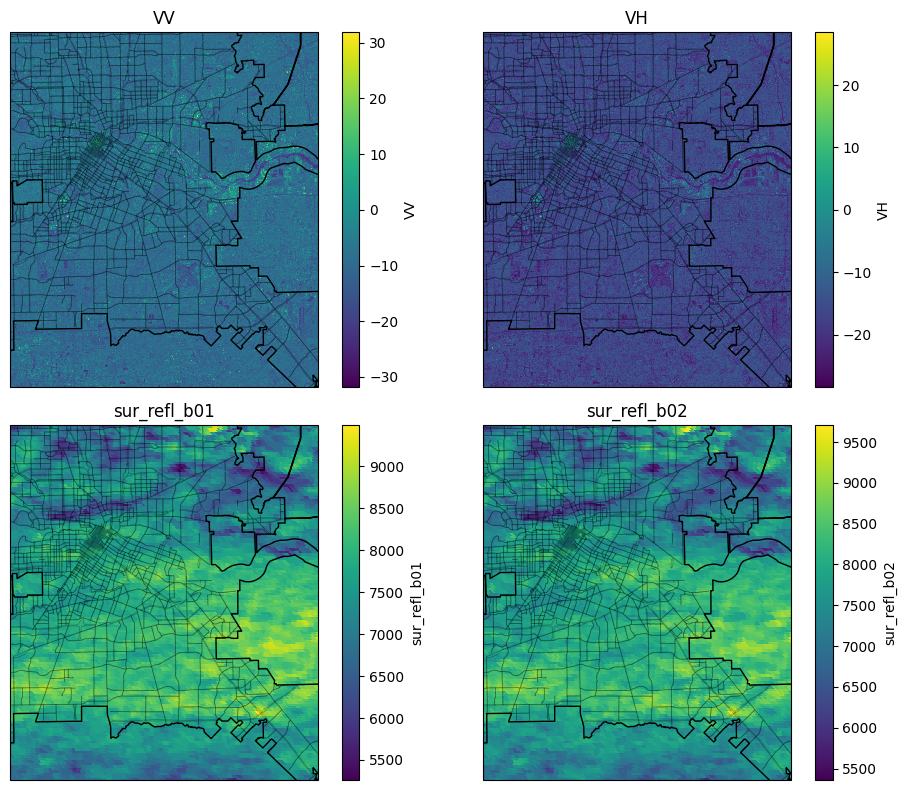

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import osmnx as ox
import geopandas as gpd

# Load the dataset (replace with your actual dataset path)
ds = xr.open_dataset('/content/drive/MyDrive/modis2s1/modis2s1.nc')

# Select four variables to plot
variables = ['VV', 'VH', 'sur_refl_b01', 'sur_refl_b02']

# Define the extent of the plot (Houston area)
extent = [-95.45, -95.15, 29.55, 29.85]

# Get the city boundaries using osmnx
city_name = "Houston, Texas, USA"
city_boundary = ox.geocode_to_gdf(city_name)

# Get the road network within the city
road_network = ox.graph_from_place(city_name, network_type='all')

# Convert the road network to a GeoDataFrame
road_edges = ox.graph_to_gdfs(road_network, nodes=False, edges=True)

# Filter for major roads (primary, secondary, tertiary)
major_road_types = ['primary', 'secondary', 'tertiary']
major_roads = road_edges[road_edges['highway'].isin(major_road_types)]

# Create the plot
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    ds[var].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Add coastlines, borders, and states for better reference
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linestyle=':')

    # Add city boundaries
    city_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, transform=ccrs.PlateCarree())

    # Add major roads with opacity of 0.5
    major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())

    # Set title
    ax.set_title(var)

# Show the plot
plt.tight_layout()

In [ ]:
ds

<xarray.Dataset>
Dimensions:           (y: 1115, x: 1114, time: 264)
Coordinates:
  * y                 (y) float64 29.85 29.85 29.85 29.85 ... 29.55 29.55 29.55
  * x                 (x) float64 -95.45 -95.45 -95.45 ... -95.15 -95.15 -95.15
  * time              (time) datetime64[ns] 2015-01-07 2015-01-19 ... 2023-12-27
    spatial_ref       int32 ...
Data variables:
    num_observations  (time, y, x) float32 ...
    sur_refl_b01      (time, y, x) float32 ...
    sur_refl_b02      (time, y, x) float32 ...
    QC_250m           (time, y, x) float64 ...
    obscov            (time, y, x) float32 ...
    iobs_res          (time, y, x) float32 ...
    orbit_pnt         (time, y, x) float32 ...
    granule_pnt       (time, y, x) float32 ...
    VV                (time, y, x) float64 ...
    VH                (time, y, x) float64 ...
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
ds

<xarray.Dataset>
Dimensions:           (y: 1115, x: 1114, time: 264)
Coordinates:
  * y                 (y) float64 29.85 29.85 29.85 29.85 ... 29.55 29.55 29.55
  * x                 (x) float64 -95.45 -95.45 -95.45 ... -95.15 -95.15 -95.15
  * time              (time) datetime64[ns] 2015-01-07 2015-01-19 ... 2023-12-27
    spatial_ref       int32 ...
Data variables:
    num_observations  (time, y, x) float32 ...
    sur_refl_b01      (time, y, x) float32 ...
    sur_refl_b02      (time, y, x) float32 ...
    QC_250m           (time, y, x) float64 ...
    obscov            (time, y, x) float32 ...
    iobs_res          (time, y, x) float32 ...
    orbit_pnt         (time, y, x) float32 ...
    granule_pnt       (time, y, x) float32 ...
    VV                (time, y, x) float64 ...
    VH                (time, y, x) float64 ...
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
vars = ['VV', 'VH', 'sur_refl_b01', 'sur_refl_b02']
ds_ = ds[vars].copy().dropna(dim='time', how='any')
x_train_1 = ds_.sur_refl_b01.values.astype(np.float32)[:,:1110,:1110]
x_train_2 = ds_.sur_refl_b02.values.astype(np.float32)[:,:1110,:1110]
y_train = ds_.VV.values.astype(np.float32)[:,:1110,:1110][:,np.newaxis]
x_train = np.stack((x_train_1, x_train_2), axis=1)

In [ ]:
ds_

<xarray.Dataset>
Dimensions:       (time: 214, y: 1115, x: 1114)
Coordinates:
  * y             (y) float64 29.85 29.85 29.85 29.85 ... 29.55 29.55 29.55
  * x             (x) float64 -95.45 -95.45 -95.45 ... -95.15 -95.15 -95.15
  * time          (time) datetime64[ns] 2015-01-07 2015-01-19 ... 2023-12-27
    spatial_ref   int32 ...
Data variables:
    VV            (time, y, x) float64 -10.33 -11.67 -9.006 ... -20.44 -22.16
    VH            (time, y, x) float64 -14.89 -20.51 -14.56 ... -21.24 -21.58
    sur_refl_b01  (time, y, x) float32 6.15e+03 6.15e+03 ... 2.377e+03 2.377e+03
    sur_refl_b02  (time, y, x) float32 6.226e+03 6.226e+03 ... 2.991e+03
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
y_train

array([[[[-10.333253 , -11.671108 ,  -9.006165 , ...,  -8.974031 ,
           -9.796545 , -11.291877 ],
         [-10.0777   ,  -8.12647  ,  -9.01847  , ...,  -8.98396  ,
          -10.208623 , -10.516725 ],
         [ -8.62981  ,  -9.675263 , -10.816672 , ..., -13.650155 ,
          -10.755891 ,  -8.043227 ],
         ...,
         [ -7.481553 ,  -9.450584 ,  -9.247617 , ...,  -9.288866 ,
          -10.980219 , -10.8604765],
         [ -8.035494 ,  -7.0718856, -11.65665  , ..., -10.235429 ,
          -10.766933 , -12.970738 ],
         [-12.203553 , -11.229348 ,  -9.963093 , ..., -12.051923 ,
           -8.423502 , -11.658296 ]]],


       [[[-11.414127 , -12.008886 , -11.384067 , ..., -12.078409 ,
          -10.487531 ,  -9.947492 ],
         [ -8.822512 ,  -8.419402 ,  -7.812164 , ...,  -7.884949 ,
           -7.9014306, -10.237548 ],
         [ -8.907097 ,  -9.791881 ,  -9.167471 , ..., -11.997706 ,
          -12.263456 ,  -6.218488 ],
         ...,
         [ -9.899654 ,  -9.89685

In [ ]:
import numpy as np

def unpatchify(patches, img_shape):
    patch_size = patches.shape[1]
    assert patches.shape[0] == (img_shape[0] // patch_size) * (img_shape[1] // patch_size), "Patches and image shape are not compatible"

    img = np.zeros(img_shape, dtype=patches.dtype)
    patch_idx = 0

    for i in range(0, img_shape[0], patch_size):
        for j in range(0, img_shape[1], patch_size):
            img[i:i + patch_size, j:j + patch_size] = patches[patch_idx]
            patch_idx += 1

    return img

def patchify(img, patch_size):
    img_shape = img.shape
    patches = np.array([img[i:i + patch_size, j:j + patch_size] for i in range(0, img_shape[0], patch_size) for j in range(0, img_shape[1], patch_size)])
    return patches

def patchify_4d(img, patch_size):
    img_shape = img.shape
    patches = np.array([
        img[:, :, i:i + patch_size, j:j + patch_size]
        for i in range(0, img_shape[2], patch_size)
        for j in range(0, img_shape[3], patch_size)
    ])
    return patches

def unpatchify_4d(patches, img_shape):
    patch_size = patches.shape[-1]
    num_patches_per_dim = img_shape[2] // patch_size
    assert patches.shape[0] == num_patches_per_dim ** 2, "Patches and image shape are not compatible"

    img = np.zeros(img_shape, dtype=patches.dtype)
    patch_idx = 0

    for i in range(0, img_shape[2], patch_size):
        for j in range(0, img_shape[3], patch_size):
            img[:, :, i:i + patch_size, j:j + patch_size] = patches[patch_idx]
            patch_idx += 1

    return img

In [ ]:
# Create patches from the image
patch_size = 30
x_train_max = x_train.max()
y_train_max = y_train.max()
x_train /= x_train_max
y_train /= y_train_max

x_train_patches = patchify_4d(x_train, patch_size).reshape(-1, 2, patch_size, patch_size)
y_train_patches = patchify_4d(y_train, patch_size).reshape(-1, 1, patch_size, patch_size)
print(x_train_patches.shape, y_train_patches.shape)

x_val_patches = x_train_patches[int(x_train_patches.shape[0]*0.8):int(x_train_patches.shape[0]*0.9)]
y_val_patches = y_train_patches[int(y_train_patches.shape[0]*0.8):int(y_train_patches.shape[0]*0.9)]

x_test_patches = x_train_patches[int(x_train_patches.shape[0]*0.9):int(x_train_patches.shape[0]*1.0)]
y_test_patches = y_train_patches[int(y_train_patches.shape[0]*0.9):int(y_train_patches.shape[0]*1.0)]

x_train_patches = x_train_patches[:int(x_train_patches.shape[0]*0.8)]
y_train_patches = y_train_patches[:int(y_train_patches.shape[0]*0.8)]

(292966, 2, 30, 30) (292966, 1, 30, 30)


In [ ]:
print(x_train_patches.shape, y_train_patches.shape)

(234372, 2, 30, 30) (234372, 1, 30, 30)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize
from PIL import Image
import os
import numpy as np

In [ ]:
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(2, 64, kernel_size=9, padding=4)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=1, padding=0)
        self.conv3 = nn.Conv2d(32, 1, kernel_size=5, padding=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.conv3(x)
        return x

In [ ]:
class ncDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __getitem__(self, index):
        x = torch.from_numpy(self.data[index]).unsqueeze(0)
        y = torch.from_numpy(self.targets[index]).unsqueeze(0)
        # x = self.data[index]
        # y = self.targets[index]
        # x = x.to(dtype=torch.float32)
        # y = y.to(dtype=torch.float32)
        return x, y

    def __len__(self):
        return len(self.data)

In [ ]:
print(x_train_patches.shape, y_train_patches.shape)

(234372, 2, 30, 30) (234372, 1, 30, 30)


In [ ]:
train_dataset = ncDataset(x_train_patches, y_train_patches)
val_dataset = ncDataset(x_val_patches, y_val_patches)
test_dataset = ncDataset(x_val_patches, y_val_patches)

In [ ]:
lr, hr = train_dataset.__getitem__(0)
print(lr.shape, hr.shape, train_dataset.__len__())

torch.Size([1, 2, 30, 30]) torch.Size([1, 1, 30, 30]) 234372


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=20, shuffle=True)

In [ ]:
# Check dataloader output
for batch in train_dataloader:
    data, targets = batch
    print(data.size())  # Should print torch.Size([20, 1, 30, 30])
    print(targets.size())  # Should print torch.Size([20, 1, 30, 601])
    break

torch.Size([20, 1, 2, 30, 30])
torch.Size([20, 1, 1, 30, 30])


In [ ]:
def train(model, train_dataloader, val_dataloader, criterion, optimizer, device):
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        lr, hr = batch
        lr, hr = lr.to(device), hr.to(device)
        optimizer.zero_grad()
        sr = model(lr[:,0,:,:,:])
        loss = criterion(sr, hr[:,0,:,:,:])
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_dataloader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            lr, hr = batch
            lr, hr = lr.to(device), hr.to(device)
            sr = model(lr[:,0,:,:,:])
            loss = criterion(sr, hr[:,0,:,:,:])
            val_loss += loss.item()

    val_loss /= len(val_dataloader)

    return train_loss, val_loss

In [ ]:
# Initialize the model, loss function, and optimizer
device = 'cuda'
model = SRCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# num_epochs = 1000
# print_interval = 10

# for epoch in range(1, num_epochs + 1):
#     train_loss, val_loss = train(model, train_dataloader, val_dataloader, criterion, optimizer, device)
#     if epoch % print_interval == 0:
#         print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("runs/srcnn")

In [ ]:
from copy import deepcopy

num_epochs = 1000
print_interval = 10
patience = 50
best_val_loss = float('inf')
counter = 0
best_model = None


for epoch in range(1, num_epochs + 1):
    train_loss, val_loss = train(model, train_dataloader, val_dataloader, criterion, optimizer, device)
# Log losses to TensorBoard
    writer.add_scalars("Loss", {"Train": train_loss, "Validation": val_loss}, epoch)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = deepcopy(model)
        counter = 0
    else:
        counter += 1

    if epoch % print_interval == 0:
        print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if counter >= patience:
        print("Early stopping triggered.")
        break
writer.close()

Epoch [10/1000] - Train Loss: 0.0098, Validation Loss: 0.0092
Epoch [20/1000] - Train Loss: 0.0098, Validation Loss: 0.0092
Epoch [30/1000] - Train Loss: 0.0098, Validation Loss: 0.0092
Epoch [40/1000] - Train Loss: 0.0098, Validation Loss: 0.0094
Epoch [50/1000] - Train Loss: 0.0098, Validation Loss: 0.0096
Epoch [60/1000] - Train Loss: 0.0098, Validation Loss: 0.0096
Epoch [70/1000] - Train Loss: 0.0098, Validation Loss: 0.0096
Epoch [80/1000] - Train Loss: 0.0098, Validation Loss: 0.0092
Epoch [90/1000] - Train Loss: 0.0098, Validation Loss: 0.0095
Early stopping triggered.


In [ ]:
best_model

SRCNN(
  (conv1): Conv2d(2, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
)

In [ ]:
model_save_path = "best_model_modis2s1_srcnn.pth"
torch.save(best_model.state_dict(), model_save_path)

In [ ]:
!cp best_model_modis2s1_srcnn.pth /content/drive/MyDrive/modis2s1/

In [ ]:
loaded_model = SRCNN().to(device)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()

SRCNN(
  (conv1): Conv2d(2, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
)

In [ ]:
for batch in test_dataloader:
    lr, hr = batch
    lr, hr = lr.to(device), hr.to(device)
    with torch.no_grad():
        sr = loaded_model(lr[:,0,:,:,:])

In [ ]:
sr.shape

torch.Size([17, 1, 30, 30])

In [ ]:
pred_sr = sr.cpu().numpy()[:,0,:,:]
pred_sr.shape

(17, 30, 30)

In [ ]:
import numpy as np
import torch

# Define the necessary variables and data processing steps
vars = ['VV', 'VH', 'sur_refl_b01', 'sur_refl_b02']
ds_ = ds[vars].copy().dropna(dim='time', how='any')
x_train_1 = ds_.sur_refl_b01.values.astype(np.float32)[:, :1110, :1110]
x_train_2 = ds_.sur_refl_b02.values.astype(np.float32)[:, :1110, :1110]
y_train = ds_.VV.values.astype(np.float32)[:, :1110, :1110][:, np.newaxis]
x_train = np.stack((x_train_1, x_train_2), axis=1)

# Normalize the training data
x_train_max = x_train.max()
y_train_max = y_train.max()
x_train /= x_train_max
y_train /= y_train_max

# Create patches from the training data
patch_size = 30  # Define your patch size here
x_train_patches = patchify_4d(x_train, patch_size).reshape(-1, 2, patch_size, patch_size)
x_train_patches_tensor = torch.from_numpy(x_train_patches).to(device)

# Function to process data in batches
def process_in_batches(model, data, batch_size=32):
    model.eval()  # Set the model to evaluation mode
    num_samples = data.size(0)
    all_outputs = []

    for i in range(0, num_samples, batch_size):
        batch_data = data[i:i + batch_size]
        with torch.no_grad():
            batch_output = model(batch_data)
        all_outputs.append(batch_output.cpu().numpy())

    return np.concatenate(all_outputs, axis=0)

# Process the patches in batches to avoid memory issues
batch_size = 32  # Adjust the batch size according to your GPU memory
predicted_sr_np = process_in_batches(loaded_model, x_train_patches_tensor, batch_size)

# Rescale and clip the predicted values
predicted_sr_np = predicted_sr_np * y_train_max
#predicted_sr_np[predicted_sr_np < 0] = 0.0

# Now, predicted_sr_np contains your super-resolved predictions

In [ ]:
predicted_sr_np.shape

(292966, 1, 30, 30)

In [ ]:
x_train_patches.shape

(292966, 2, 30, 30)

In [ ]:
def unpatchify_4d(patches, img_shape, patch_size):
    """
    Reconstructs the original image from patches.

    Parameters:
    patches (np.ndarray): The array of image patches.
    img_shape (tuple): The shape of the original image (N, C, H, W).
    patch_size (int): The size of the patches.

    Returns:
    np.ndarray: The reconstructed 4D image array.
    """
    N, C, H, W = img_shape
    reconstructed_img = np.zeros(img_shape, dtype=patches.dtype)

    patch_index = 0
    for i in range(0, H, patch_size):
        for j in range(0, W, patch_size):
            reconstructed_img[:, :, i:i + patch_size, j:j + patch_size] = patches[patch_index]
            patch_index += 1

    return reconstructed_img

In [ ]:
predicted_sr_np.shape

(292966, 1, 30, 30)

In [ ]:
reconstructed_predicted_sr = unpatchify_4d(predicted_sr_np[:,:,:,:], (214, 1, 1110,1110), 30)
reconstructed_predicted_sr.shape

(214, 1, 1110, 1110)

In [ ]:
ds_trim = ds_.isel(x=slice(0, 1110), y=slice(0, 1110))
ds_trim['pred_VV'] = (('time', 'y', 'x'), reconstructed_predicted_sr[:,0,:,:])

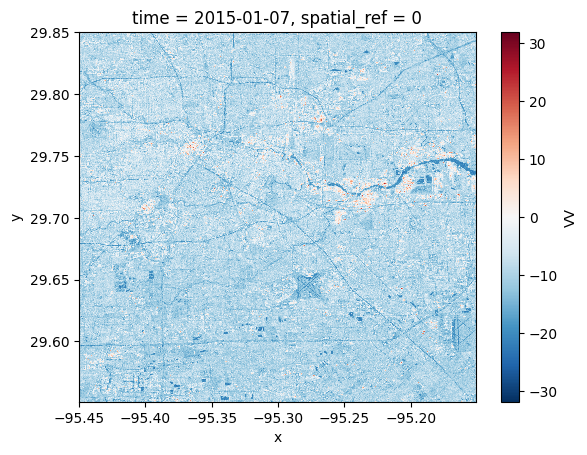

In [ ]:
ds_trim.VV.isel(time=0).plot()

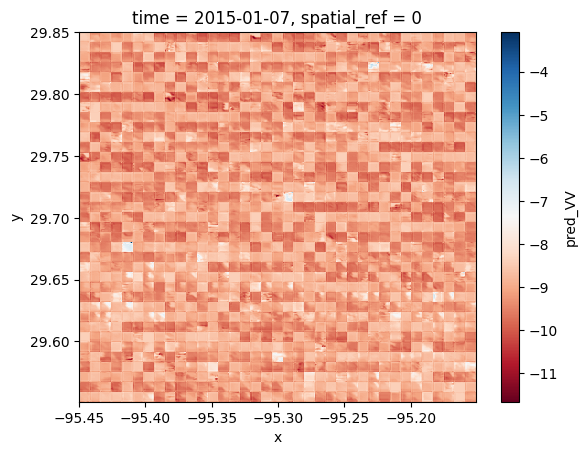

In [ ]:
ds_trim.pred_VV.isel(time=0).plot(cmap='RdBu')